<a href="https://colab.research.google.com/github/styxx216/zoomcamp_mlops/blob/main/zoomcamp_mlops_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-02 17:18:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.8’

data.csv.8          100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2023-10-02 17:18:58 (30.4 MB/s) - ‘data.csv.8’ saved [1475504/1475504]



In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

In [337]:
df = pd.read_csv('data.csv')

In [338]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [339]:
useful_columns = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg','MSRP']

In [340]:
df = df[useful_columns]

In [341]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Vehicle Style         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

In [342]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [343]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [344]:
df = df.fillna(0)

In [345]:
df = df.rename(columns = {'msrp':'price'})

1

In [346]:
df['transmission_type'].groupby(df['transmission_type']).count()

transmission_type
automated_manual     626
automatic           8266
direct_drive          68
manual              2935
unknown               19
Name: transmission_type, dtype: int64

2

In [347]:
list(df.dtypes[df.dtypes != 'object'].index)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


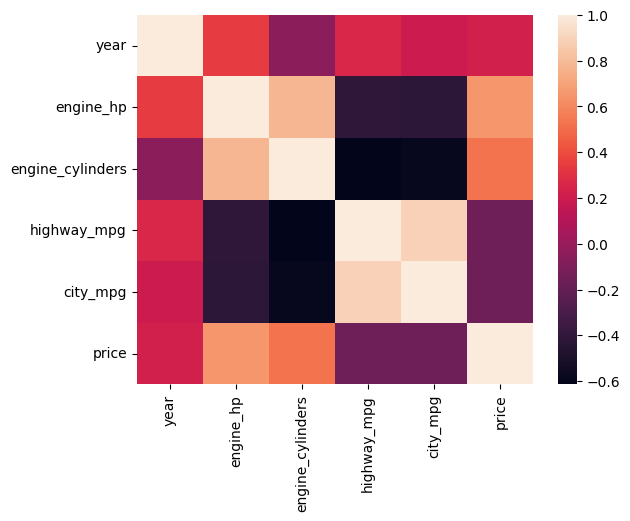

In [348]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
sns.heatmap(df[numerical_columns].corr())
df[numerical_columns].corr()

In [349]:
df['above_average'] = (df['price']>df['price'].mean()).astype(int)

In [350]:
df_full_train, df_test= train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=42)

In [351]:
print(len(df_train), len(df_val), len(df_test))

7148 2383 2383


3

In [352]:
for c in ['make','model', 'transmission_type', 'vehicle_style']:
    print(c,round(mutual_info_score(df_train['above_average'], df_train[c]), 2))

make 0.24
model 0.46
transmission_type 0.02
vehicle_style 0.08


4

In [353]:
numerical_columns = numerical_columns[:-1]

In [354]:
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [355]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df_train['above_average'].values

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_val= df_val['above_average'].values

In [356]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [357]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [358]:
y_val_proba_predict = model.predict_proba(X_val)
y_val_predict = model.predict(X_val)

In [359]:
y_val_predict

array([0, 1, 0, ..., 0, 1, 1])

In [360]:
churn_decision = (y_val_proba_predict>=0.5)
churn_decision  = np.multiply((y_val_proba_predict>=0.5), 1)[:,1]

In [361]:
print(round((y_val == churn_decision).mean(),2))

0.95


In [362]:
print(round((y_val == y_val_predict).mean(),2))

0.95


5

In [363]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'city_mpg': 0.078,
 'engine_cylinders': -0.113,
 'engine_hp': 0.037,
 'highway_mpg': -0.003,
 'make=acura': 1.357,
 'make=alfa_romeo': 1.83,
 'make=aston_martin': 0.606,
 'make=audi': 2.934,
 'make=bentley': 0.181,
 'make=bmw': 2.4,
 'make=bugatti': 0.0,
 'make=buick': -0.491,
 'make=cadillac': 2.367,
 'make=chevrolet': -1.503,
 'make=chrysler': -1.421,
 'make=dodge': -3.873,
 'make=ferrari': 0.382,
 'make=fiat': -0.522,
 'make=ford': -1.927,
 'make=genesis': 0.635,
 'make=gmc': -0.978,
 'make=honda': -1.328,
 'make=hummer': -0.252,
 'make=hyundai': -2.699,
 'make=infiniti': 0.335,
 'make=kia': -1.53,
 'make=lamborghini': 0.011,
 'make=land_rover': 1.954,
 'make=lexus': 1.331,
 'make=lincoln': 1.209,
 'make=lotus': 4.059,
 'make=maserati': 1.072,
 'make=maybach': 0.005,
 'make=mazda': -1.671,
 'make=mclaren': 0.0,
 'make=mercedes-benz': 0.939,
 'make=mitsubishi': -2.041,
 'make=nissan': -0.993,
 'make=oldsmobile': -1.46,
 'make=plymouth': -0.364,
 'make=pontiac': -3.229,
 'make=porsch

In [364]:
columns = ['year', 'engine_hp','transmission_type','city_mpg']

In [365]:
for c in columns :
    small_model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    small = list((categorical_columns + numerical_columns).copy())

    small.remove(c)
    dicts_train_small = df_train[small].to_dict(orient='records')
    dicts_val_small = df_val[small].to_dict(orient='records')

    dv_small = DictVectorizer(sparse=False)
    dv_small.fit(dicts_train_small)

    X_train_small = dv_small.transform(dicts_train_small)
    y_train = df_train['above_average']

    X_val_small = dv_small.transform(dicts_val_small)
    y_val = df_val['above_average']
    small_model.fit(X_train_small,y_train)

    print(c,(small_model.predict(X_val_small)==y_val).mean())

year 0.9483843894250944
engine_hp 0.9227864036928242
transmission_type 0.9454469156525388
city_mpg 0.9324381032312211


In [366]:
y_train

3972     0
1997     0
5216     1
2805     0
11369    0
        ..
9232     0
5710     0
11306    0
4414     0
10286    0
Name: above_average, Length: 7148, dtype: int64

6

In [367]:
df_train['price_log'] = np.log(df_train['price'])
df_val['price_log'] = np.log(df_val['price'])

y_train = df_train['price_log'].values

y_val= df_val['price_log'].values

In [368]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average,price_log
3972,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15,33599,0,10.422252
1997,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17,26245,0,10.175231
5216,lamborghini,gallardo,2012,570.0,10.0,manual,convertible,20,12,248000,1,12.421184
2805,chevrolet,colorado,2016,200.0,4.0,automatic,crew_cab_pickup,27,20,24990,0,10.126231
11369,pontiac,vibe,2009,158.0,4.0,automatic,4dr_hatchback,26,20,20475,0,9.926960
...,...,...,...,...,...,...,...,...,...,...,...,...
9232,toyota,sienna,2016,266.0,6.0,automatic,passenger_minivan,25,18,37655,0,10.536221
5710,chevrolet,hhr,2009,260.0,4.0,manual,wagon,29,21,25135,0,10.132017
11306,hyundai,veracruz,2012,260.0,6.0,automatic,4dr_suv,22,17,28345,0,10.252206
4414,mitsubishi,expo,1993,136.0,4.0,manual,2dr_hatchback,26,19,2000,0,7.600902


In [369]:
alphas = [0,0.01,0.1,1,10]
for alpha in alphas:
    model = Ridge(alpha = alpha, solver = 'sag',max_iter = 100,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(alpha, MSE(y_val,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.27142490797509555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.27142491594303153


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.2714249876538721


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.27142570473952693
10 0.27143287343746464


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
